# **Pontificia Universidad Javeriana**
###Daniel Andrés Pineda Suárez
#**Inteligencia artificial**
###Tercera Tarea
###Octubre 2021

###**Primer punto**

In [81]:
from google.colab import drive 
drive.mount('/content/gdrive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df=pd.read_csv("/content/gdrive/MyDrive/IA Datasets/data_classification.csv", sep=';',header=0)
features=np.array(df)[:,:-1];


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [82]:

unos=np.ones(100);
unos=unos[:,np.newaxis];
features=np.concatenate([unos,features],1)

labels=np.array(df)[:,-1];
labels=labels[:,np.newaxis]
features_train=features[0:80]
features_test=features[80:]
labels_train=labels[0:80]
labels_test=labels[80:]



In [83]:
def sigmoid(z):
 return 1.0 / (1 + np.exp(-z))

In [84]:

def predict(features, weights):
 z = np.dot(features, weights)
 return sigmoid(z)

In [85]:
#Costo
 
def cost_function(features, labels, weights):
 observations = len(labels)
 predictions = predict(features, weights)
 #Take the error when label=1
 class1_cost = -labels*np.log(predictions)
 #Take the error when label=0
 class2_cost = (1-labels)*np.log(1-predictions)
 #Take the sum of both costs
 cost = class1_cost - class2_cost
 #Take the average cost
 cost = cost.sum() / observations
 return cost

In [86]:
def update_weights(features, labels, weights, lr):
 N = len(features)

 #1 - Get Predictions
 predictions = predict(features, weights)
 #2 Transpose features from (200, 3) to (3, 200)
 gradient = np.dot(features.T, predictions - labels)
 #3 Take the average cost derivative for each feature
 gradient /= N
 #4 - Multiply the gradient by our learning rate
 gradient *= lr
 #5 - Subtract from our weights to minimize cost
 weights -= gradient
 return weights


In [87]:
def decision_boundary(prob):
  return 1 if prob >= .5 else 0


In [88]:
 def classify(predictions):

  decision_boundary = np.vectorize(decision_boundary)

  return decision_boundary(predictions).flatten()

In [89]:
def train(features, labels, weights, lr, iters):
  cost_history = []

  for i in range(iters):
    weights = update_weights(features, labels, weights, lr)
    #Calculate error for auditing purposes
    cost = cost_function(features, labels, weights)
    cost_history.append(cost)
   # Lg Progress
    if i % 1000 == 0:
        print("Iteración: "+str(i) + " cost: "+str(cost))
  return weights, cost_history 



In [90]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

In [91]:
from numpy import random
W=np.array(random.rand(3))
W=W[:,np.newaxis]


Iteración: 0 cost: 1.929983686774755
Iteración: 1000 cost: 0.38465471021674247
Iteración: 2000 cost: 0.3272031502627971


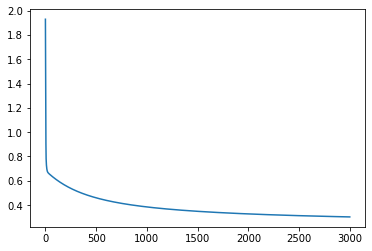

In [92]:
weights,cost_history=train(features=features_train, labels=labels_train, weights=W, lr=0.05, iters=3000)
probabilidades=predict(features_test,weights)
label_predicter=[]
for i in range(0,len(probabilidades)):
  label_predicter.append(decision_boundary(probabilidades[i]))

label_predicter=np.array(label_predicter)
label_predicter=label_predicter[:,np.newaxis]

accuracy=accuracy(label_predicter, labels_test)

plt.plot(cost_history)



###**Segundo punto**

In [93]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
#Regresión logística, Random state en 0 y ajuste.
clf = LogisticRegression(random_state=0).fit(X, y)
#Predicción para las muestras
clf.predict(X[:2, :])
# Probabilidad de la predicción.
clf.predict_proba(X[:2, :])
#Precisión 
clf.score(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9733333333333334